# Importing Required Libraries

In [1]:
import cv2

In [2]:
import numpy as np
import glob
import os
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Importing Input  Images

In [3]:
#Importing Shirt Images
from os import listdir
from os.path import isfile, join
import numpy
import cv2

mypath="C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Train/Shirt"
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images_shirt = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images_shirt[n] = cv2.imread( join(mypath,onlyfiles[n]) )

In [4]:
images_shirt

array([array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254

In [5]:
for i in images_shirt:
    cv2.imshow('Shirt',i)
    cv2.waitKey(0)
cv2.destroyAllWindows()    

In [6]:
#Importing Tshirt Images
mypath1=r"C:\Users\Fahad Ehtesham\Desktop\data Trained\FLIP ROBO\Web Scrapping\Train\Tshirt"
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath1,f)) ]
images_Tshirt = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images_Tshirt[n] = cv2.imread( join(mypath1,onlyfiles[n]) )  

In [7]:
images_Tshirt

array([array([[[244, 239, 240],
        [244, 239, 240],
        [244, 239, 240],
        ...,
        [242, 237, 238],
        [242, 237, 238],
        [242, 237, 238]],

       [[244, 239, 240],
        [244, 239, 240],
        [244, 239, 240],
        ...,
        [242, 237, 238],
        [242, 237, 238],
        [242, 237, 238]],

       [[244, 239, 240],
        [244, 239, 240],
        [244, 239, 240],
        ...,
        [242, 237, 238],
        [242, 237, 238],
        [242, 237, 238]],

       ...,

       [[226, 221, 222],
        [226, 221, 222],
        [226, 221, 222],
        ...,
        [192, 191, 195],
        [192, 191, 195],
        [192, 191, 195]],

       [[226, 221, 222],
        [226, 221, 222],
        [226, 221, 222],
        ...,
        [192, 191, 195],
        [192, 191, 195],
        [192, 191, 195]],

       [[226, 221, 222],
        [226, 221, 222],
        [226, 221, 222],
        ...,
        [192, 191, 195],
        [192, 191, 195],
        [192, 191

In [8]:
for i in images_Tshirt:
    cv2.imshow('Tshirt',i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()   

# Applying Augmentation Techniques

# 1.Rotation

In [9]:
m=0
os.mkdir('Rotated_shirt')
for i in  images_shirt:
    height,width=i.shape[:2]
    rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),30,.5)
    rotated_image=cv2.warpAffine(i,rotation_matrix,(width,height))
    cv2.imwrite("Rotated_shirt/image"+str(m)+".jpg",rotated_image)     
    m +=1
    #cv2.imshow('Rotated_image',rotated_image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()    

In [10]:
m=0
os.mkdir('Rotated_tshirt')
for i in  images_Tshirt:
    height,width=i.shape[:2]
    rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),-30,.5)
    rotated_image=cv2.warpAffine(i,rotation_matrix,(width,height))
    cv2.imwrite("Rotated_tshirt/image"+str(m)+".jpg",rotated_image)     
    m +=1
    #cv2.imshow('Rotated_image',rotated_image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows() 

# 2.Playing with Brightness

In [11]:
#Increasing the  shirts brightness
m=0
os.mkdir('inc_brightness_shirt')
for i in images_shirt:
    M=np.ones(i.shape,dtype="uint8")*100
    inc=cv2.add(i,M)
    #cv2.imshow("increasing_brightness",inc)
    cv2.imwrite("inc_brightness_shirt/image"+str(m)+".jpg",inc)
    m +=1


In [12]:
#Increasing the tshirt brightness
m=0
os.mkdir('inc_brightness_tshirt')
for i in images_Tshirt:
    M=np.ones(i.shape,dtype="uint8")*100
    inc=cv2.add(i,M)
    #cv2.imshow("increasing_brightness",inc)
    cv2.imwrite("inc_brightness_tshirt/image"+str(m)+".jpg",inc)
    m +=1


In [13]:
#Decreasing the brightness for shirt
m=0
os.mkdir('dec_brightness_shirt')
for i in images_shirt:
    M=np.ones(i.shape,dtype="uint8")*100
    inc=cv2.subtract(i,M)
    cv2.imwrite("dec_brightness_shirt/image"+str(m)+".jpg",inc)
    m +=1
    #cv2.imshow("increasing_brightness",inc)

In [14]:
#Decreasing the brightness for Tshirt
m=0
os.mkdir('dec_brightness_Tshirt')
for i in images_Tshirt:
    M=np.ones(i.shape,dtype="uint8")*100
    inc=cv2.subtract(i,M)
    cv2.imwrite("dec_brightness_Tshirt/image"+str(m)+".jpg",inc)
    m +=1
    #cv2.imshow("increasing_brightness",inc)

# 3.SHARPENING

In [15]:
#Creating Kernels for sharpening:
kernel=np.array([[-1,-1,-1],
                    [-1,10,-1],
                    [-1,-1,-1]])
m=0
os.mkdir('Sharpening_tshirt')
for i in images_Tshirt:
    sharped1=cv2.filter2D(i,-1,kernel)
    #cv2.imshow("increasing_brightness",inc)
    cv2.imwrite("Sharpening_tshirt/image"+str(m)+".jpg",sharped1)
    m +=1

In [16]:
#Creating Kernels for sharpening:
kernel=np.array([[-1,-1,-1],
                    [-1,10,-1],
                    [-1,-1,-1]])
m=0
os.mkdir('Sharpening_Shirt')
for i in images_shirt:
    sharped=cv2.filter2D(i,-1,kernel)
    cv2.imwrite("Sharpening_Shirt/image"+str(m)+".jpg",sharped)
    m +=1

# 4.FLIPPING

In [17]:
#Creating Kernels for sharpening:
m=0
os.mkdir('FLIP_tshirt')
for i in images_Tshirt:
    img_flip = cv2.flip(i, 1)
    #cv2.imshow("increasing_brightness",inc)
    cv2.imwrite("FLIP_tshirt/image"+str(m)+".jpg",img_flip)
    m +=1

k=0   
os.mkdir('Flip_Shirt')
for i in images_shirt:
    img_flip1 = cv2.flip(i, 1)
    cv2.imwrite("Flip_Shirt/image"+str(k)+".jpg",img_flip1)
    k +=1

# Importing Required Libraries for CNN

In [4]:
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

In [5]:
input_shape=(100,100,3)
image_width=100
image_height=100
nb_train_samples=305
nb_validation_samples=80

batch_size= 30
epochs = 30

train_data_dir="C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Train"
validation_data_dir="C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Validation"

In [6]:
#Rescale the pixels values from [0,255] to [0,1] interval
datagen=ImageDataGenerator(rescale=1./255)

#automatically retrieves images and their classes for train and validation sets
train_generator=datagen.flow_from_directory(
                    train_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=batch_size ,class_mode='binary')

validation_generator=datagen.flow_from_directory(
                    validation_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=batch_size ,class_mode='binary')

Found 305 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


# Creating CNN

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [8]:
import keras
import keras.utils
from keras import utils as np_utils
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                           validation_data=validation_generator,
                            validation_steps=nb_validation_samples//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 2/10 [=====>........................] - ETA: 4:35 - loss: 2.0631 - acc: 0.5500

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (8.832818). Check your callbacks.
  % delta_t_median)


10/10 [==============================] - 76s 8s/step - loss: 1.0463 - acc: 0.5467 - val_loss: 0.7355 - val_acc: 0.5667
Epoch 2/30
10/10 [==============================] - 5s 454ms/step - loss: 0.6354 - acc: 0.6672 - val_loss: 0.6571 - val_acc: 0.7200
Epoch 3/30
10/10 [==============================] - 4s 426ms/step - loss: 0.4819 - acc: 0.7950 - val_loss: 0.4710 - val_acc: 0.9000
Epoch 4/30
10/10 [==============================] - 5s 498ms/step - loss: 0.3555 - acc: 0.8538 - val_loss: 0.4080 - val_acc: 0.8167
Epoch 5/30
 2/10 [=====>........................] - ETA: 1s - loss: 0.2276 - acc: 0.9167

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157874). Check your callbacks.
  % delta_t_median)


10/10 [==============================] - 11s 1s/step - loss: 0.5126 - acc: 0.8286 - val_loss: 0.6040 - val_acc: 0.6800
Epoch 6/30
10/10 [==============================] - 3s 269ms/step - loss: 0.2404 - acc: 0.9160 - val_loss: 0.4112 - val_acc: 0.8400
Epoch 7/30
10/10 [==============================] - 2s 210ms/step - loss: 0.1687 - acc: 0.9496 - val_loss: 0.4820 - val_acc: 0.7833
Epoch 8/30
10/10 [==============================] - 2s 213ms/step - loss: 0.0950 - acc: 0.9731 - val_loss: 0.5637 - val_acc: 0.7600
Epoch 9/30
10/10 [==============================] - 2s 227ms/step - loss: 0.2884 - acc: 0.9395 - val_loss: 0.5774 - val_acc: 0.7200
Epoch 10/30
10/10 [==============================] - 2s 169ms/step - loss: 0.0774 - acc: 0.9765 - val_loss: 0.5292 - val_acc: 0.8167
Epoch 11/30
10/10 [==============================] - 2s 167ms/step - loss: 0.0323 - acc: 0.9933 - val_loss: 0.2613 - val_acc: 0.8800
Epoch 12/30
10/10 [==============================] - 2s 176ms/step - loss: 0.0109 - acc

In [10]:
history_dict=history.history

In [11]:
history_dict

{'val_loss': [0.7354735136032104,
  0.6570507645606994,
  0.47099785804748534,
  0.4079868197441101,
  0.6039768338203431,
  0.41116008162498474,
  0.481995165348053,
  0.56372572183609,
  0.5774076581001282,
  0.5292422473430634,
  0.2613459944725037,
  0.857214167714119,
  0.48359039425849915,
  0.6061242341995239,
  0.6591151356697083,
  0.6106139719486237,
  0.7408978700637817,
  1.1435241222381591,
  1.744632065296173,
  0.4096350848674774,
  0.9260153532028198,
  0.8531038463115692,
  0.6445913076400757,
  1.3699710369110107,
  1.0937887132167816,
  0.3663035988807678,
  1.6754626512527466,
  0.8906115591526031,
  1.147062563896179,
  0.6392637722194194],
 'val_acc': [0.5666666924953461,
  0.7199999928474426,
  0.9000000119209289,
  0.8166666626930237,
  0.6800000190734863,
  0.8399999976158142,
  0.7833333313465118,
  0.7600000143051148,
  0.7200000047683716,
  0.8166666626930237,
  0.8799999952316284,
  0.800000011920929,
  0.8833333253860474,
  0.8199999928474426,
  0.87999998

# Plotting Loss  vs Epochs

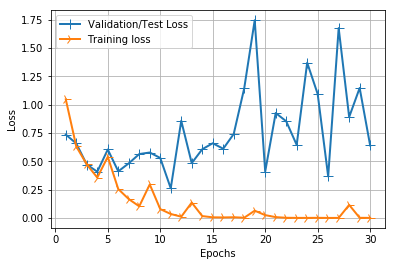

In [12]:
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Accuracy vs Epochs

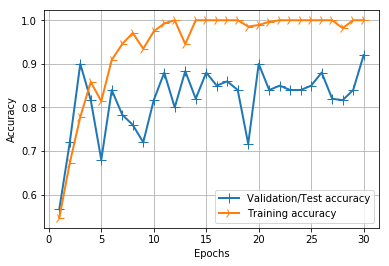

In [13]:
import matplotlib.pyplot as plt
accuracy=history_dict['acc']
val_accuracy_values=history_dict['val_acc']
epochs=range(1,len(accuracy)+1)

line1=plt.plot(epochs,val_accuracy_values,label='Validation/Test accuracy')
line2=plt.plot(epochs,accuracy,label='Training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Conclusion :

Here is this assignment we have initially performed the augmentation technique on our input images and then we have tried to classify the image using CNN . We have applied 3 layered Cnn with paramaters like drop outs , max pooling. We have used rmsprop as optimiser for optimising weights.




